In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

%reload_ext autoreload
from utils import load_images, load_features, save_features

images_paths_train, images_train = load_images(True)
images_paths_train

,image_name,label,path,train,label_id,image_id
0,image25107.jpg,apparel,images/apparel/image25107.jpg,True,9,0
1,image26799.jpg,apparel,images/apparel/image26799.jpg,True,9,1
2,image23088.jpg,apparel,images/apparel/image23088.jpg,True,9,2
3,image0421.jpg,apparel,images/apparel/image0421.jpg,True,9,3
4,image15994.jpg,apparel,images/apparel/image15994.jpg,True,9,4
...,...,...,...,...,...,...
545,image2255.png,toys,images/toys/image2255.png,True,8,545
546,image2221.jpeg,toys,images/toys/image2221.jpeg,True,8,546
547,image0019.jpeg,toys,images/toys/image0019.jpeg,True,8,547
548,image1903.jpeg,toys,images/toys/image1903.jpeg,True,8,548


In [43]:
# Función para convertir imágenes a escala de grises y aplicar SIFT
def convert_to_gray_and_apply_sift(images):
    gray_images = []
    descriptors_list = []
    indice_imagen = []

    sift = cv2.SIFT_create()
    for idx, img in enumerate(images):
        # Convertir la imagen a escala de grises
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # gray_img = cv2.resize()
        gray_images.append(gray_img)

        # Aplicar SIFT en la imagen en escala de grises
        _, descriptors = sift.detectAndCompute(gray_img, None)
        if not(descriptors is None) and len(descriptors) > 3:
            descriptors_list.append(descriptors)
            indice_imagen += [idx] * descriptors.shape[0]
        else:
            pass
            # print(img.shape)
            # plt.imshow(img)
        

    return descriptors_list, indice_imagen

# Convertir las imágenes a escala de grises y aplicar SIFT en el subconjunto de imágenes
descriptors, index = convert_to_gray_and_apply_sift(images_train)
print("Dimensiones del descriptor de la primera imagen:", descriptors[1].shape)
#descriptors = np.concatenate(descriptors)


Dimensiones del descriptor de la primera imagen: (73, 128)


In [44]:
save_features(descriptors, index, images_paths_train, "descriptors")

In [45]:
meta, features = load_features('features/descriptors.csv')
meta

,image_id,label_id
0,0,9
1,0,9
2,0,9
3,0,9
4,0,9
...,...,...
73695,549,8
73696,549,8
73697,549,8
73698,549,8


In [46]:
images_paths_test ,images_test = load_images(False)
images_paths_test

,image_name,label,path,train,label_id,image_id
0,image6479.jpg,apparel,images/apparel/image6479.jpg,False,9,0
1,image2791.jpg,apparel,images/apparel/image2791.jpg,False,9,1
2,image9608.jpg,apparel,images/apparel/image9608.jpg,False,9,2
3,image26288.jpg,apparel,images/apparel/image26288.jpg,False,9,3
4,image8901.jpg,apparel,images/apparel/image8901.jpg,False,9,4
...,...,...,...,...,...,...
105,image0375.jpeg,toys,images/toys/image0375.jpeg,False,8,105
106,image0354.jpeg,toys,images/toys/image0354.jpeg,False,8,106
107,image0480.jpeg,toys,images/toys/image0480.jpeg,False,8,107
108,image0955.jpeg,toys,images/toys/image0955.jpeg,False,8,108


In [56]:
def show_images(images,ids):
    for i in range(len(ids)):
        plt.imshow(images[ids[i]])
        plt.show()

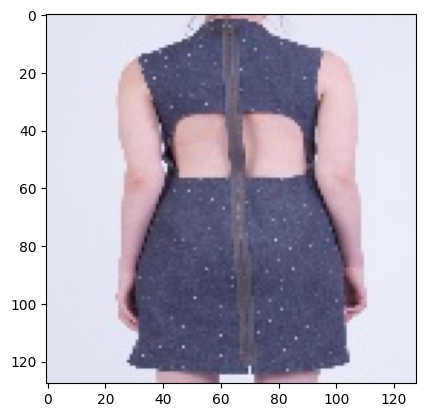

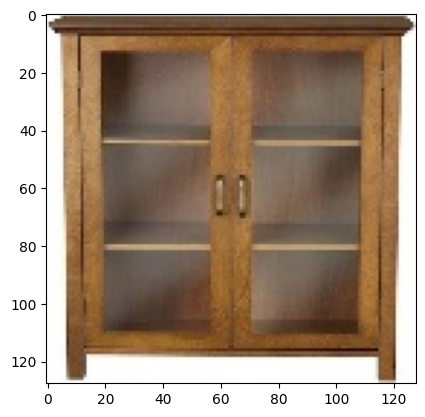

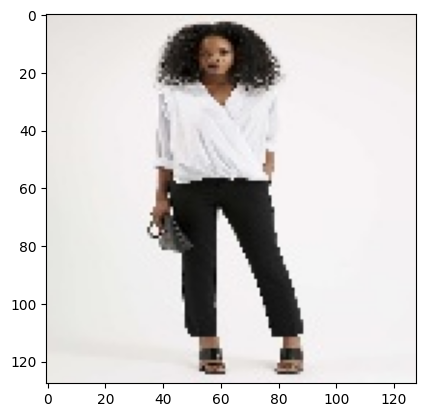

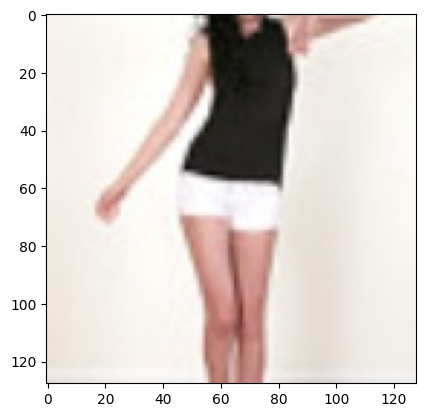

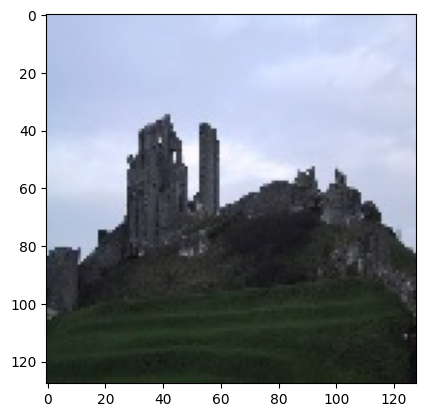

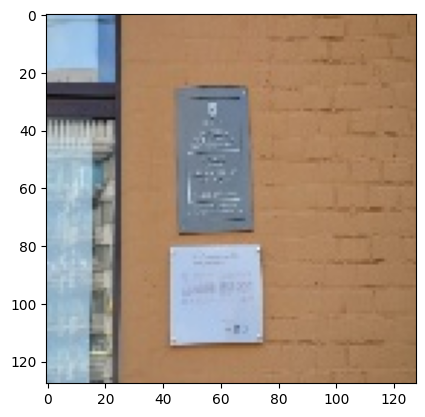

In [75]:
df_descrip = pd.read_csv('./features/descriptors.csv')
df_descrip = df_descrip.drop(['label_id'],axis=1)
df_descrip = df_descrip.groupby('image_id').sum()
df_descrip = df_descrip.mean(axis=1)
medias_descrip = np.array(df_descrip)
idx_query = 30
distancias = []
for elemento in np.nditer(medias_descrip):
    resta = abs(elemento - medias_descrip[idx_query])
    distancias.append(resta)
n_vecinos = 5
idx_vecinos = sorted(enumerate(distancias),key=lambda x: x[1])[:n_vecinos+1]
idx_vecinos = [idx[0] for idx in idx_vecinos]
idx_vecinos
show_images(images_train,idx_vecinos)